/home/Qian.Xiao/miniconda3/envs/mom6py/lib/python3.12/site-packages/numpy/ma/core.py:6980: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)
/home/Qian.Xiao/miniconda3/envs/mom6py/lib/python3.12/site-packages/numpy/ma/core.py:6980: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)
/home/Qian.Xiao/miniconda3/envs/mom6py/lib/python3.12/site-packages/numpy/ma/core.py:6980: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)
/home/Qian.Xiao/miniconda3/envs/mom6py/lib/python3.12/site-packages/numpy/ma/core.py:6980: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)
/home/Qian.Xiao/miniconda3/envs/mom6py/lib/python3.12/site-packages/numpy/ma/core.py:6980: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


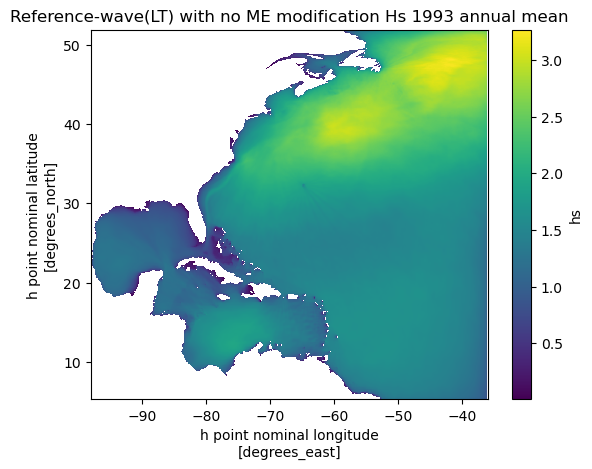

<Figure size 640x480 with 0 Axes>

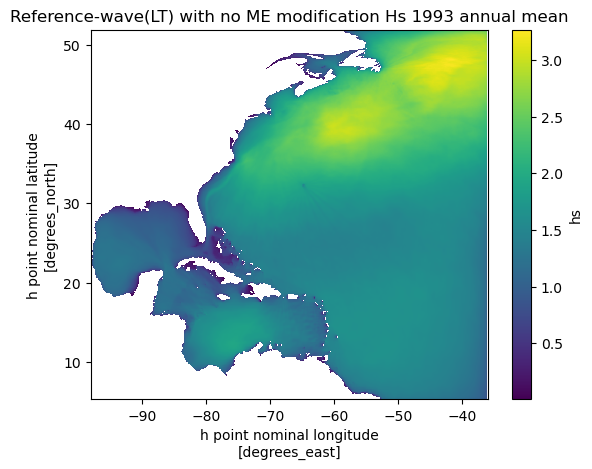

<Figure size 640x480 with 0 Axes>

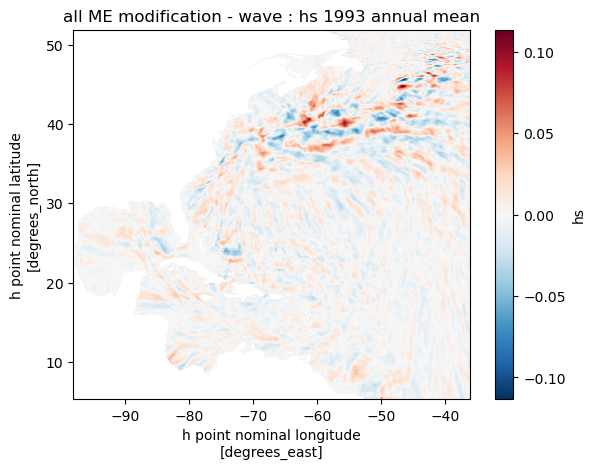

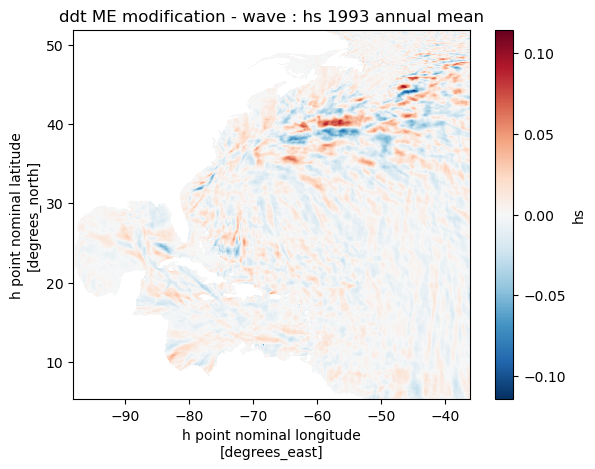

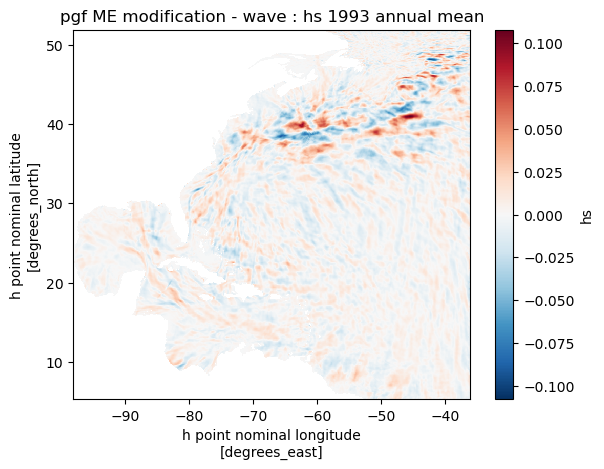

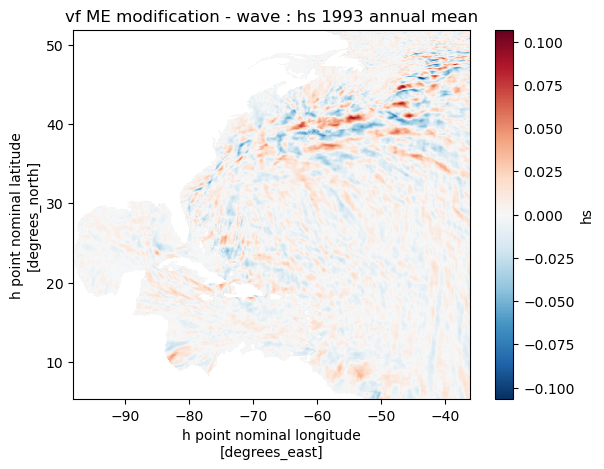

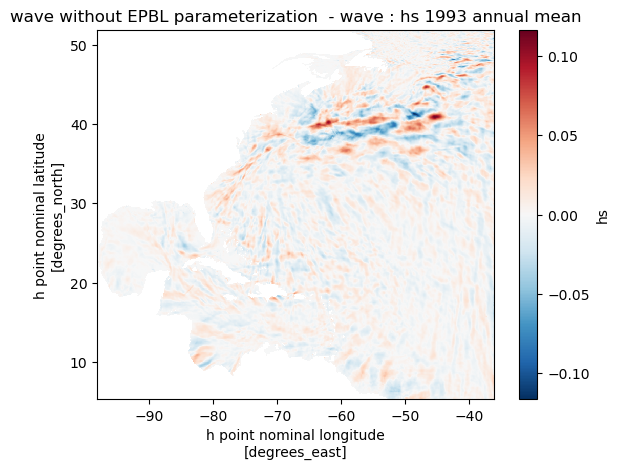

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
import xarray 
import numpy as np
import logging
from netCDF4 import Dataset
import xarray as xr

    # Ideally would use SSH, but some diag_tables only saved zos----for coupled waves
pp_root_wave="/archive/Qian.Xiao/Qian.Xiao/FMS_Wave_Coupling_ZC/c5/postProcessing/NWA12.COBALT_wave"
pp_root_uncou="/archive/Qian.Xiao/Qian.Xiao/FMS_Wave_Coupling_ZC/c5/postProcessing/NWA12.COBALTuncou"
pp_root_uncou_LAfalse="/archive/Qian.Xiao/Qian.Xiao/FMS_Wave_Coupling_ZC/c5/postProcessing/NWA12.COBALTuncou_LALTFalse"
pp_root_all="/archive/Qian.Xiao/Qian.Xiao/FMS_Wave_Coupling_ZC/c5/postProcessing/NWA12.COBALT_all"
pp_root_ddt="/archive/Qian.Xiao/Qian.Xiao/FMS_Wave_Coupling_ZC/c5/postProcessing/NWA12.COBALT_DDT"
pp_root_pgf="/archive/Qian.Xiao/Qian.Xiao/FMS_Wave_Coupling_ZC/c5/postProcessing/NWA12.COBALT_PGF"
pp_root_vf="/archive/Qian.Xiao/Qian.Xiao/FMS_Wave_Coupling_ZC/c5/postProcessing/NWA12.COBALT_VF"
pp_root_nolan="/archive/Qian.Xiao/Qian.Xiao/FMS_Wave_Coupling_ZC/c5/postProcessing/NWA12.COBALT_wavenoLan"

ocean_daily_1= xarray.open_dataset(pp_root_wave+"/19930101_results/19930101.ocean_daily.nc")

model_grid_x = ocean_daily_1.variables['xh']
model_grid_y = ocean_daily_1.variables['yh']

# waveInfo_1= Dataset(pp_root_wave+"/19930101_results/ww3.19930101.nc")

# ucur=waveInfo_1.variables['ucur'][:]
# vcur=waveInfo_1.variables['vcur'][:]
# uwnd=waveInfo_1.variables['uwnd'][:]
# vwnd=waveInfo_1.variables['vwnd'][:]
# t = waveInfo_1.variables['time'][:]
# cur=np.sqrt(ucur**2 + vcur**2)
# wnd=np.sqrt(uwnd**2 + vwnd**2)  
# da_cur = xr.DataArray(
#     cur,
#     dims=['time', 'yh', 'xh'],  # Adjust based on your variable's shape
#     coords={'time': t, 'xh': model_grid_x, 'yh': model_grid_y},  # Define coordinates
#     name='cur'  # Optional: Give the variable a name
# )
# cur_mean = da_cur.mean(dim='time')

# da_wnd = xr.DataArray(
#     wnd,
#     dims=['time', 'yh', 'xh'],  # Adjust based on your variable's shape
#     coords={'time': t, 'xh': model_grid_x, 'yh': model_grid_y},  # Define coordinates
#     name='wnd'  # Optional: Give the variable a name
# )
# wnd_mean = da_wnd.mean(dim='time')
# ocean_daily_2= xarray.open_dataset(pp_root+"/19930301_results/19930301.ocean_daily.nc")
# ocean_daily_3= xarray.open_dataset(pp_root+"/19930501_results/19930501.ocean_daily.nc")
# ocean_daily_4= xarray.open_dataset(pp_root+"/19930701_results/19930701.ocean_daily.nc")
# ocean_daily_5= xarray.open_dataset(pp_root+"/19930901_results/19930901.ocean_daily.nc")
# ocean_daily_6= xarray.open_dataset(pp_root+"/19931101_results/19931101.ocean_daily.nc")
def hs_mean_method(pp_root,model_grid_x,model_grid_y,date):
    date_str=str(date)+"01"
    date_2=str(date+1)
    if (date+2)==199313:
        date_3="199401"
    else:
        date_3=str(date+2)
    
    ww3_1= Dataset(pp_root+"/"+date_str+"_results/ww3."+date_str+".nc")
    ww3_2= Dataset(pp_root+"/"+date_str+"_results/ww3."+date_2+".nc")
    ww3_3= Dataset(pp_root+"/"+date_str+"_results/ww3."+date_3+".nc")
    # ww3_usp=Dataset(pp_root_wave+"ww3.199301_usp.nc")
    def hs_mean(ww3,model_grid_x,model_grid_y):
    
        hs = ww3.variables['hs'][:]
        t = ww3.variables['time'][:]
        ucur=ww3.variables['ucur'][:]
        vcur=ww3.variables['vcur'][:]
        uwnd=ww3.variables['uwnd'][:]
        vwnd=ww3.variables['vwnd'][:]
        cur=np.sqrt(ucur**2 + vcur**2)
        wnd=np.sqrt(uwnd**2 + vwnd**2)        
        
        da_hs = xr.DataArray(
            hs,
            dims=['time', 'yh', 'xh'],  # Adjust based on your variable's shape
            coords={'time': t, 'xh': model_grid_x, 'yh': model_grid_y},  # Define coordinates
            name='hs'  # Optional: Give the variable a name
        )
        hs_mean = da_hs.mean(dim='time')

        da_cur = xr.DataArray(
            cur,
            dims=['time', 'yh', 'xh'],  # Adjust based on your variable's shape
            coords={'time': t, 'xh': model_grid_x, 'yh': model_grid_y},  # Define coordinates
            name='cur'  # Optional: Give the variable a name
        )
        cur_mean = da_cur.mean(dim='time')

        da_wnd = xr.DataArray(
            wnd,
            dims=['time', 'yh', 'xh'],  # Adjust based on your variable's shape
            coords={'time': t, 'xh': model_grid_x, 'yh': model_grid_y},  # Define coordinates
            name='wnd'  # Optional: Give the variable a name
        )
        wnd_mean = da_wnd.mean(dim='time')
        
        return hs_mean, cur_mean, wnd_mean

    hs_mean_1,cur_mean_1, wnd_mean_1=hs_mean(ww3_1,model_grid_x,model_grid_y)
    hs_mean_2,cur_mean_2, wnd_mean_2=hs_mean(ww3_2,model_grid_x,model_grid_y)
    hs_mean_3,cur_mean_3, wnd_mean_3=hs_mean(ww3_3,model_grid_x,model_grid_y)
    

    hs_mean_method=(hs_mean_1+hs_mean_2+hs_mean_3)/3
    hs_mean_2=(hs_mean_2+hs_mean_3)/2

    cur_mean_method=(cur_mean_1+cur_mean_2+cur_mean_3)/3
    cur_mean_2=(cur_mean_2+cur_mean_3)/2

    wnd_mean_method=(wnd_mean_1+wnd_mean_2+wnd_mean_3)/3
    wnd_mean_2=(wnd_mean_2+wnd_mean_3)/2
    
    return hs_mean_1,hs_mean_2,hs_mean_method,wnd_mean_1,wnd_mean_2,wnd_mean_method,cur_mean_1,cur_mean_2,cur_mean_method

def hs_mean_annual(pp_root,model_grid_x,model_grid_y):
    _,_,hs_mean_1,_,_,wnd_mean_1,_,_,cur_mean_1=hs_mean_method(pp_root,model_grid_x,model_grid_y,199301)
    _,_,hs_mean_2,_,_,wnd_mean_2,_,_,cur_mean_2=hs_mean_method(pp_root,model_grid_x,model_grid_y,199303)   
    _,_,hs_mean_3,_,_,wnd_mean_3,_,_,cur_mean_3=hs_mean_method(pp_root,model_grid_x,model_grid_y,199305)
    _,_,hs_mean_4,_,_,wnd_mean_4,_,_,cur_mean_4=hs_mean_method(pp_root,model_grid_x,model_grid_y,199307)
    _,_,hs_mean_5,_,_,wnd_mean_5,_,_,cur_mean_5=hs_mean_method(pp_root,model_grid_x,model_grid_y,199309)
    _,_,hs_mean_6,_,_,wnd_mean_6,_,_,cur_mean_6=hs_mean_method(pp_root,model_grid_x,model_grid_y,199311)    
    hs_mean=(hs_mean_1+hs_mean_2+hs_mean_3+hs_mean_4+hs_mean_5+hs_mean_6)/6
    wnd_mean=(wnd_mean_1+wnd_mean_2+wnd_mean_3+wnd_mean_4+wnd_mean_5+wnd_mean_6)/6
    cur_mean=(cur_mean_1+cur_mean_2+cur_mean_3+cur_mean_4+cur_mean_5+cur_mean_6)/6
    return hs_mean, wnd_mean, cur_mean


    
hs_mean_wave,wnd_mean_wave, cur_mean_wave=hs_mean_annual(pp_root_wave,model_grid_x,model_grid_y)    
hs_mean_all,wnd_mean_all, cur_mean_all=hs_mean_annual(pp_root_all,model_grid_x,model_grid_y)    
hs_mean_ddt,wnd_mean_ddt, cur_mean_ddt=hs_mean_annual(pp_root_ddt,model_grid_x,model_grid_y)  
hs_mean_pgf,wnd_mean_pgf, cur_mean_pgf=hs_mean_annual(pp_root_pgf,model_grid_x,model_grid_y)  
hs_mean_vf,wnd_mean_vf, cur_mean_vf=hs_mean_annual(pp_root_vf,model_grid_x,model_grid_y)  
hs_mean_nolan,wnd_mean_nolan, cur_mean_nolan=hs_mean_annual(pp_root_nolan,model_grid_x,model_grid_y)  

plt.figure()
hs_mean_wave.plot()
plt.title('Reference-wave(LT) with no ME modification Hs 1993 annual mean')
plt.show()
plt.figure()

# fig = plt.figure(figsize=(18,6))
# gs = fig.add_gridspec(1,2)
# ax = fig.add_subplot(gs[0])
# plths=plt.pcolormesh(hs_mean[:,:], vmin=0, vmax=10)
# ax.set_title(f"Significant wave height at 19930131")
# fig.colorbar(plths, ax=ax, orientation='vertical', label='HS (m)')
plt.figure()
hs_mean_wave.plot()
plt.title('Reference-wave(LT) with no ME modification Hs 1993 annual mean')
plt.show()
plt.figure()

diff_hs_all=hs_mean_all - hs_mean_wave
plt.figure()
diff_hs_all.plot()
plt.title('all ME modification - wave : hs 1993 annual mean')
plt.show()

diff_hs_ddt=hs_mean_ddt - hs_mean_wave
plt.figure()
diff_hs_ddt.plot()
plt.title('ddt ME modification - wave : hs 1993 annual mean')
plt.show()

diff_hs_pgf=hs_mean_pgf - hs_mean_wave
plt.figure()
diff_hs_pgf.plot()
plt.title('pgf ME modification - wave : hs 1993 annual mean')
plt.show()

diff_hs_vf=hs_mean_vf - hs_mean_wave
plt.figure()
diff_hs_vf.plot()
plt.title('vf ME modification - wave : hs 1993 annual mean')
plt.show()

diff_hs_nolan=hs_mean_nolan - hs_mean_wave
plt.figure()
diff_hs_nolan.plot()
plt.title('wave without EPBL parameterization  - wave : hs 1993 annual mean')
plt.show()

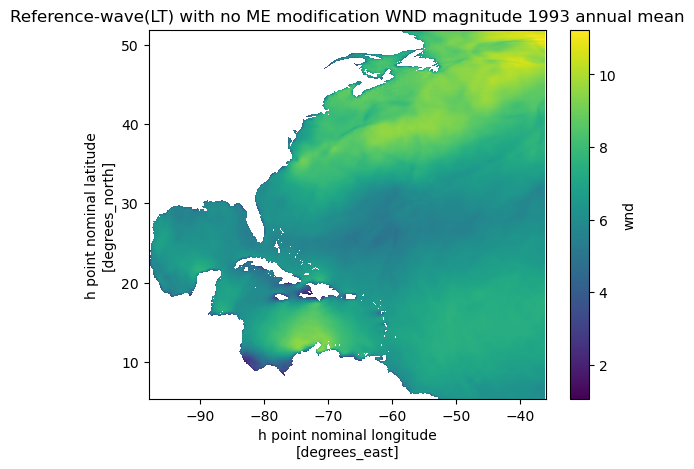

<Figure size 640x480 with 0 Axes>

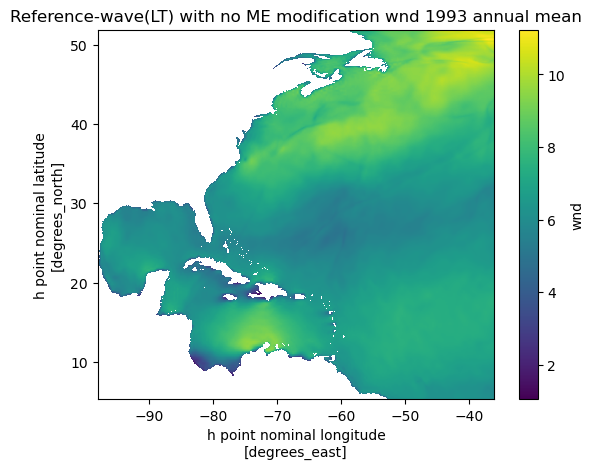

<Figure size 640x480 with 0 Axes>

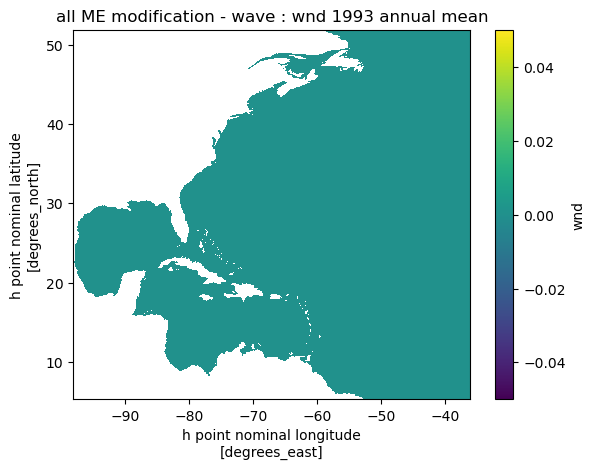

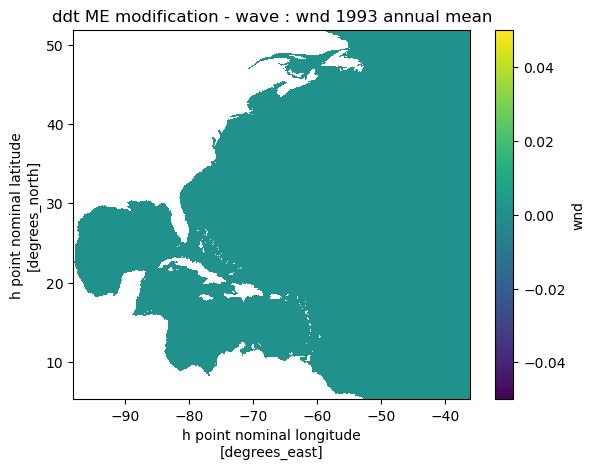

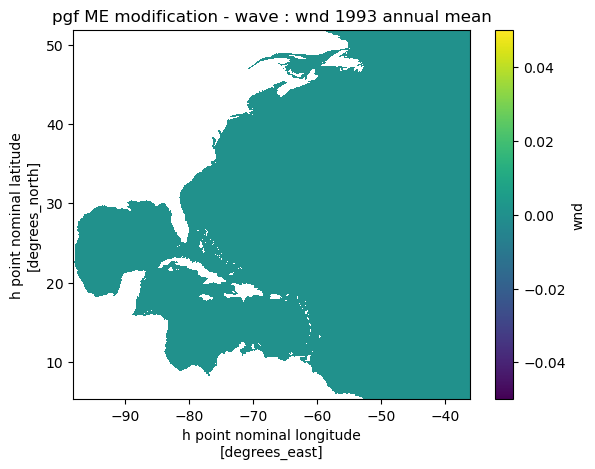

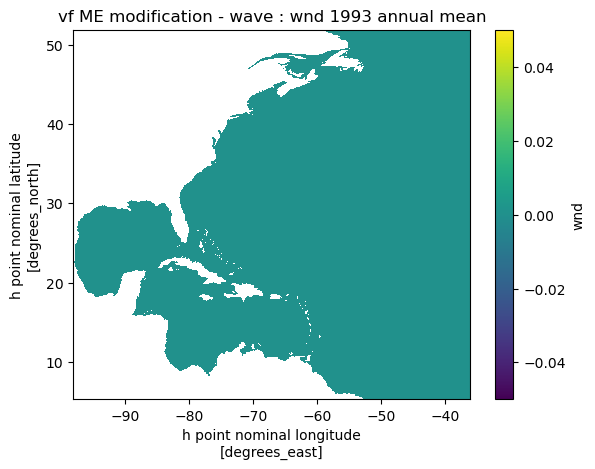

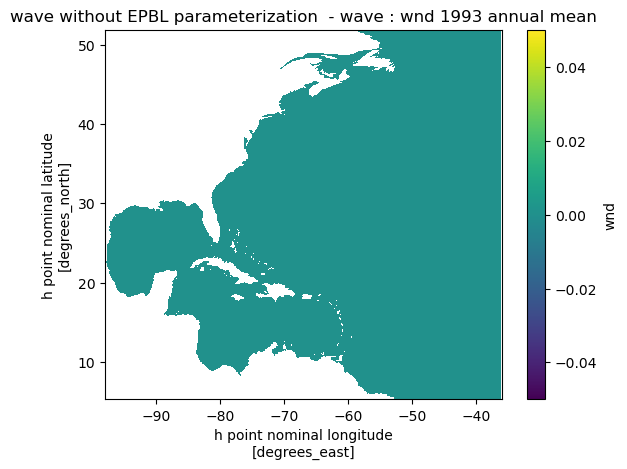

In [2]:

plt.figure()
wnd_mean_wave.plot()
plt.title('Reference-wave(LT) with no ME modification wnd 1993 annual mean')
plt.show()
plt.figure()

diff_wnd_all=wnd_mean_all - wnd_mean_wave
plt.figure()
diff_wnd_all.plot()
plt.title('all ME modification - wave : wnd 1993 annual mean')
plt.show()

diff_wnd_ddt=wnd_mean_ddt - wnd_mean_wave
plt.figure()
diff_wnd_ddt.plot()
plt.title('ddt ME modification - wave : wnd 1993 annual mean')
plt.show()

diff_wnd_pgf=wnd_mean_pgf - wnd_mean_wave
plt.figure()
diff_wnd_pgf.plot()
plt.title('pgf ME modification - wave : wnd 1993 annual mean')
plt.show()

diff_wnd_vf=wnd_mean_vf - wnd_mean_wave
plt.figure()
diff_wnd_vf.plot()
plt.title('vf ME modification - wave : wnd 1993 annual mean')
plt.show()

diff_wnd_nolan=wnd_mean_nolan - wnd_mean_wave
plt.figure()
diff_wnd_nolan.plot()
plt.title('wave without EPBL parameterization  - wave : wnd 1993 annual mean')
plt.show()

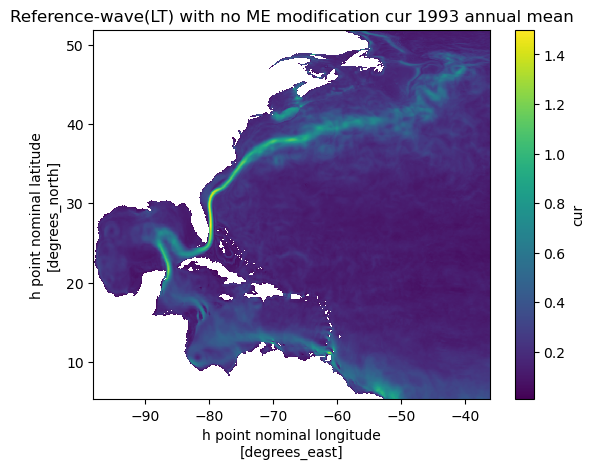

<Figure size 640x480 with 0 Axes>

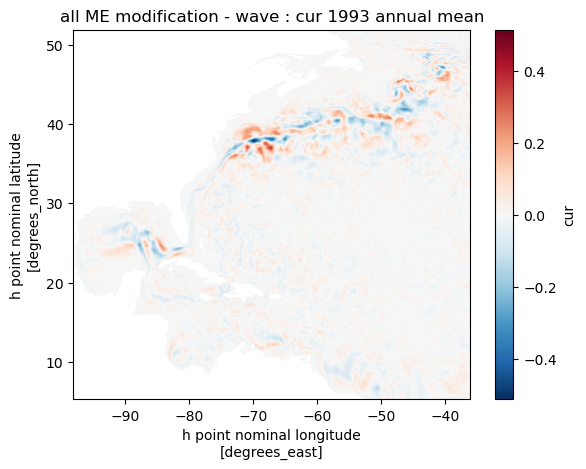

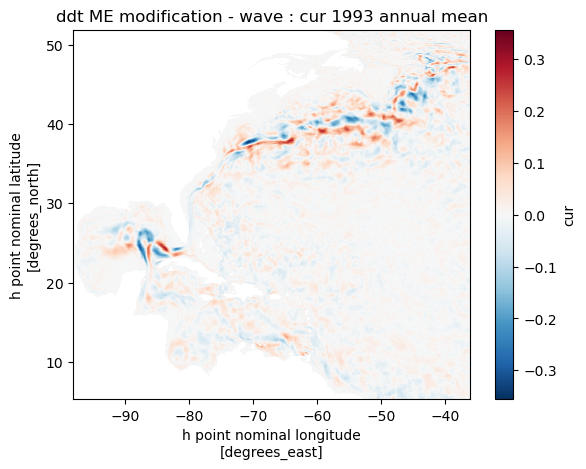

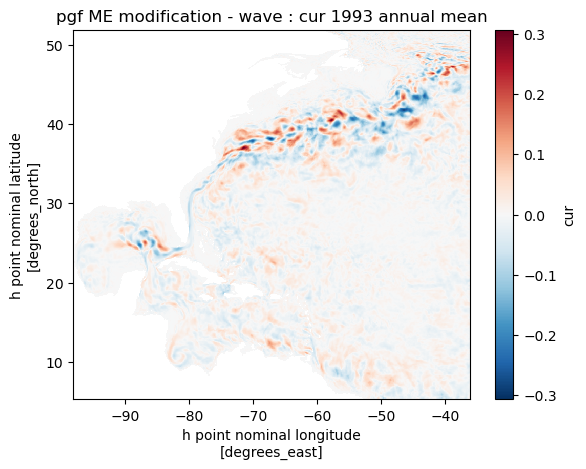

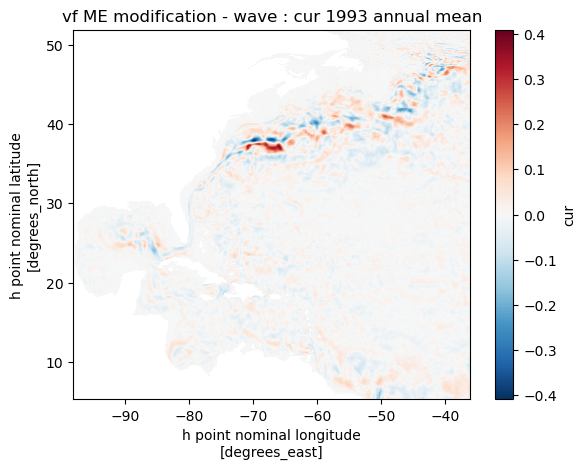

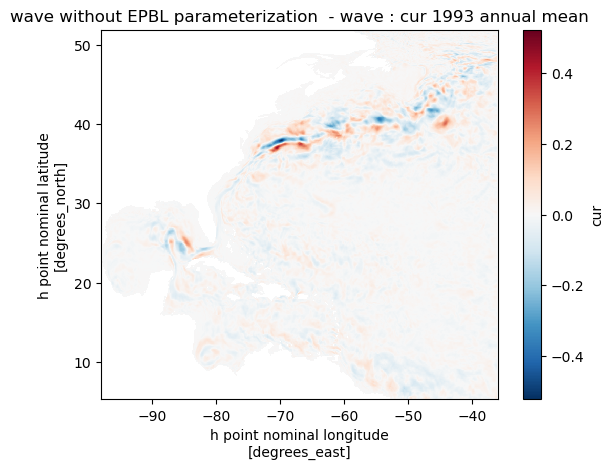

In [3]:

plt.figure()
cur_mean_wave.plot()
plt.title('Reference-wave(LT) with no ME modification cur 1993 annual mean')
plt.show()
plt.figure()

diff_cur_all=cur_mean_all - cur_mean_wave
plt.figure()
diff_cur_all.plot()
plt.title('all ME modification - wave : cur 1993 annual mean')
plt.show()

diff_cur_ddt=cur_mean_ddt - cur_mean_wave
plt.figure()
diff_cur_ddt.plot()
plt.title('ddt ME modification - wave : cur 1993 annual mean')
plt.show()

diff_cur_pgf=cur_mean_pgf - cur_mean_wave
plt.figure()
diff_cur_pgf.plot()
plt.title('pgf ME modification - wave : cur 1993 annual mean')
plt.show()

diff_cur_vf=cur_mean_vf - cur_mean_wave
plt.figure()
diff_cur_vf.plot()
plt.title('vf ME modification - wave : cur 1993 annual mean')
plt.show()

diff_cur_nolan=cur_mean_nolan - cur_mean_wave
plt.figure()
diff_cur_nolan.plot()
plt.title('wave without EPBL parameterization  - wave : cur 1993 annual mean')
plt.show()